## Basic Linear/Polynomial Regression Demo

Demonstrates the basic use of the linear regression model from sklearn:

[https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Simple one-dimensional data prediction.  Basic model and data based upon an example by S. Srinidhi:

[https://medium.com/@contactsunny/linear-regression-in-python-using-scikit-learn-f0f7b125a204](https://medium.com/@contactsunny/linear-regression-in-python-using-scikit-learn-f0f7b125a204)

In [1]:
# imports and setup
import math
import numpy as np
import pandas # manipulate data frames

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
np.set_printoptions(suppress=True, precision=2)
pandas.set_option('precision', 2) # number precision for pandas
plt.style.use('seaborn') # pretty matplotlib plots

In [2]:
# read and display data-set
data = pandas.read_csv('C:\\Users\\lexis\\OneDrive - Tufts\\2.0 Summer \'21\\Comp135\\demo01_start\\salaryData.csv')

In [3]:
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
# separate out the inputs (x) and outputs (y)
x = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [5]:
# inputs (x) should be a columnar arrangement, one data-point per row
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [6]:
# outputs (y) is a single array of values, one per row of x
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [7]:
# divide data: 2/3 to train model, 1/3 to test for validation
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=1/3)

In [8]:
xTrain

array([[3.7],
       [9.5],
       [5.3],
       [2. ],
       [1.3],
       [7.1],
       [6. ],
       [3.2],
       [4.5],
       [2.9],
       [8.7],
       [9. ],
       [3.2],
       [6.8],
       [3. ],
       [4. ],
       [9.6],
       [1.5],
       [4.1],
       [5.1]])

In [9]:
yTrain

array([ 57189., 116969.,  83088.,  43525.,  46205.,  98273.,  93940.,
        54445.,  61111.,  56642., 109431., 105582.,  64445.,  91738.,
        60150.,  55794., 112635.,  37731.,  57081.,  66029.])

In [10]:
# build the basic linear model, fit to the training data;
# finds min-error coefficient for x
linReg = LinearRegression()
linReg.fit(xTrain, yTrain) # takes x's and y's and adjusts the lin weights to minimize error -- analytically or w gradient decent


LinearRegression()

In [11]:
# the predictions the model makes on input sets; 
# compare predictions on yTrain to correct values, above
yTestPredict = linReg.predict(xTest)
yTrainPredict = linReg.predict(xTrain)
yTrainPredict # these are decently close to the values in yTrain (see above)

array([ 61355.29, 114955.43,  76141.54,  45644.91,  39175.93,  92776.06,
        82610.52,  56734.59,  68748.41,  53962.17, 107562.3 , 110334.73,
        56734.59,  90003.64,  54886.31,  64127.71, 115879.57,  41024.21,
        65051.85,  74293.26])

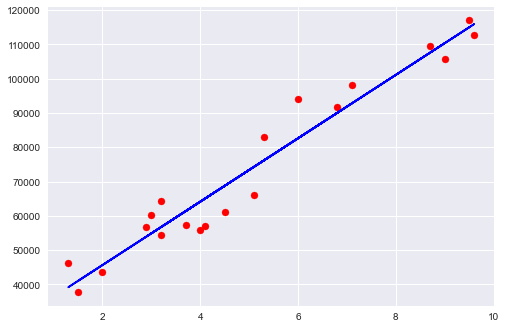

In [12]:
# plot predicted line for training set
plt.scatter(xTrain, yTrain, color="red") # original data -- trends upwards, makes sense to use lin reg here
plt.plot(xTrain, yTrainPredict, color="blue")
plt.show()

In [13]:
# overall squared error on training
mean_squared_error(yTrain, yTrainPredict)

34589795.60487155

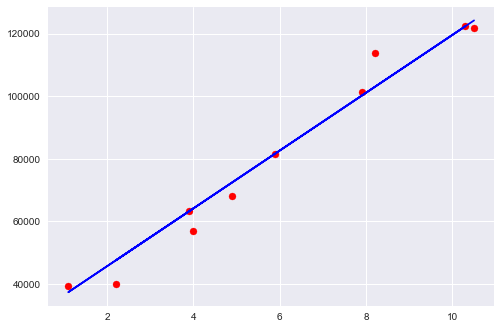

In [14]:
# plot predicted line for test data
plt.scatter(xTest, yTest, color="red") # original data -- trends upwards, makes sense to use lin reg here
plt.plot(xTest, yTestPredict, color="blue")
plt.show()

In [15]:
# overall squared error on testing; 
# will *generally* be somewhat larger than training error, 
# but should be reasonably close (if we do things properly)
# and *can* be less in some cases due to luck
mean_squared_error(yTest, yTestPredict)

25854706.935163725

### Building a higher-order polynomial regression

We can modify our input data features to increase their dimensionality.  One way to do this is to use the `PolynomialFeatures` libary, which can transform data by adding higher-degree polynomial values for each input point.

In [16]:
# for proper plots of the higher-order values, it is necessary to first sort
# the data by the original x-component (ensuring that the matching y-values
# are sorted accordingly, as well)
import operator
sorted_zip = sorted(zip(xTrain, yTrain), key=operator.itemgetter(0))
xTrain, yTrain = zip(*sorted_zip)

In [17]:
# the basic degree-2 transform adds the square of the data to the original
# (along with a bias vector of 1's for the 0th weight)

In [18]:
from sklearn.preprocessing import PolynomialFeatures as pf
poly2 = pf(degree=2)
xTrain2 = poly2.fit_transform(xTrain) 
xTrain2

array([[ 1.  ,  1.3 ,  1.69],
       [ 1.  ,  1.5 ,  2.25],
       [ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.9 ,  8.41],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.7 , 13.69],
       [ 1.  ,  4.  , 16.  ],
       [ 1.  ,  4.1 , 16.81],
       [ 1.  ,  4.5 , 20.25],
       [ 1.  ,  5.1 , 26.01],
       [ 1.  ,  5.3 , 28.09],
       [ 1.  ,  6.  , 36.  ],
       [ 1.  ,  6.8 , 46.24],
       [ 1.  ,  7.1 , 50.41],
       [ 1.  ,  8.7 , 75.69],
       [ 1.  ,  9.  , 81.  ],
       [ 1.  ,  9.5 , 90.25],
       [ 1.  ,  9.6 , 92.16]])

In [19]:
linReg2 = LinearRegression()
linReg2.fit(xTrain2, yTrain)
yTrainPredict2 = linReg2.predict(xTrain2)

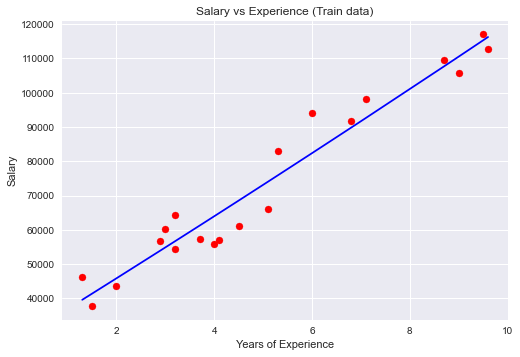

In [20]:
# plot predicted line for training set
plt.scatter(xTrain, yTrain, color='red')

plt.plot(xTrain, yTrainPredict2, color='blue')
plt.title('Salary vs Experience (Train data)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [21]:
# while the order-2 polynomial doesn't make much difference here,
# we can now extend things to include even higher-order terms
poly3 = pf(degree=3)
xTrain3 = poly3.fit_transform(xTrain)
linearRegression3 = LinearRegression()
linearRegression3.fit(xTrain3, yTrain)
yTrainPredict3 = linearRegression3.predict(xTrain3)

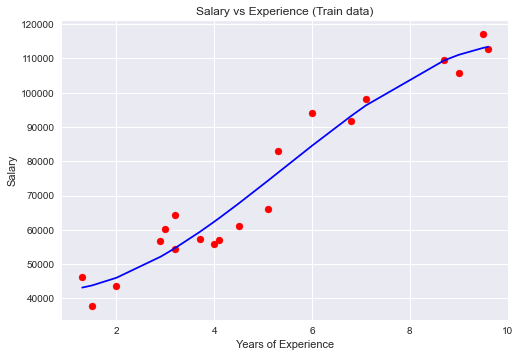

In [22]:
# plot predicted line for training set
plt.scatter(xTrain, yTrain, color='red')

plt.plot(xTrain, yTrainPredict3, color='blue')
plt.title('Salary vs Experience (Train data)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [23]:
# while the order-2 polynomial doesn't make much difference here,
# we can now extend things to include even higher-order terms
poly10 = pf(degree=40)
xTrain10 = poly10.fit_transform(xTrain)
linearRegression10 = LinearRegression()
linearRegression10.fit(xTrain10, yTrain)
yTrainPredict10 = linearRegression10.predict(xTrain10)

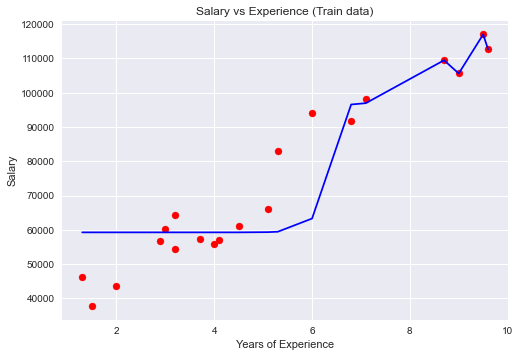

In [24]:
# plot predicted line for training set
plt.scatter(xTrain, yTrain, color='red')

plt.plot(xTrain, yTrainPredict10, color='blue')
plt.title('Salary vs Experience (Train data)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

### Looking for overfitting

Are polynomial transformations always a good idea?  Not so much.  As we increase the dimensions, it is increasingly possible that we move our model from a robust general solution to one that is highly overfit to the training data.  This can start to show up as training error continues to decrease, while testing error goes the other way at some point.

In [25]:
for i in range(1,12):
    polyTransform = pf(degree=i)
    xTrainTransform = polyTransform.fit_transform(xTrain)
    xTestTransform = polyTransform.fit_transform(xTest)
    linearRegressionModel = LinearRegression()
    linearRegressionModel.fit(xTrainTransform, yTrain)
    yTrainPredict = linearRegressionModel.predict(xTrainTransform)
    yTestPredict = linearRegressionModel.predict(xTestTransform)
    mseTrain = mean_squared_error(yTrain, yTrainPredict) / max(y)
    mseTest = mean_squared_error(yTest, yTestPredict) / max(y)
    print('Degree {:02d}: Train: {:f}, Test: {:f}'.format(i, mseTrain, mseTest))

Degree 01: Train: 282.617150, Test: 211.246799
Degree 02: Train: 282.208917, Test: 211.516457
Degree 03: Train: 245.911823, Test: 259.188065
Degree 04: Train: 242.736287, Test: 462.717031
Degree 05: Train: 210.350653, Test: 723.408835
Degree 06: Train: 199.888716, Test: 3812.384267
Degree 07: Train: 106.228205, Test: 69887.793634
Degree 08: Train: 88.215139, Test: 5507.353136
Degree 09: Train: 85.344557, Test: 59194.491625
Degree 10: Train: 81.927079, Test: 18362.665866
Degree 11: Train: 54.536715, Test: 6645043.710256


### Food for thought
In the above code, increasing the polynomial degree even higher, to 20 or 30, can show trends that are quite different.  At some point the both sorts of error actually start to grow.  Why might that be?